In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = None # Displays all rows
pd.options.display.max_columns = None # Displays all columns

## Data Gathering 

Data was available on the Kaggle website (https://www.kaggle.com/aungpyaeap/supermarket-sales)

In [2]:
df = pd.read_csv("supermarket_sales.csv") # https://www.kaggle.com/aungpyaeap/supermarket-sales
df = df.drop_duplicates() # Remove duplicate rows

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [93]:
df['Product line'].describe()

count                    1000
unique                      6
top       Fashion accessories
freq                      178
Name: Product line, dtype: object

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Questions

#### Question 1: Which City has highest total gross income?

In [5]:
gross_income = df.groupby(['City']).agg(GrossIncome = ('gross income', 'sum'))
gross_income

,GrossIncome
City,
Mandalay,5057.0320
Naypyitaw,5265.1765
Yangon,5057.1605


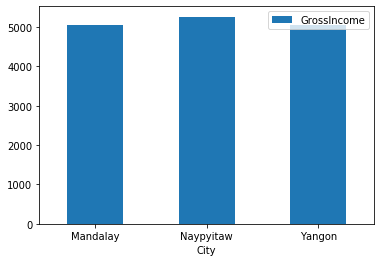

In [9]:
gross_income.plot.bar(rot=0)

As can be seen in the above graph, total gross income is highest for the **Naypyitaw** city = $5265.18

#### Question 2: What are total spendings based on Member status and Gender?

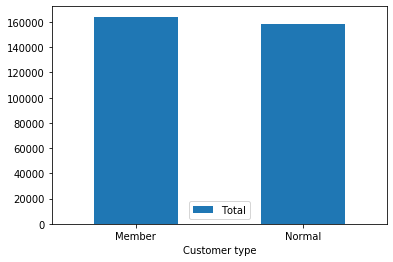

In [38]:
df.groupby(['Customer type']).agg({'Total':'sum'}).plot.bar(rot=0);

Members spend more than Non-Members by **$5480.14**

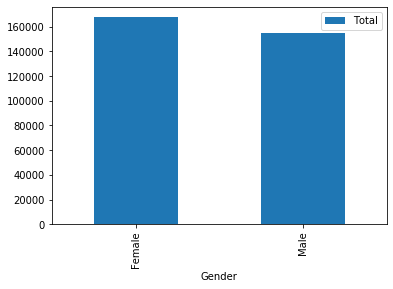

In [42]:
df.groupby(['Gender']).agg({'Total':'sum'}).plot.bar();

Females spend more than Males by **$12,799.1**

#### Question 3: Which is the most common mode of payment for Members/Non-Members?

In [19]:
df.groupby('Customer type').agg({'Gender' : 'count'})

,Gender
Customer type,
Member,501
Normal,499


In [91]:
df.groupby(['Customer type','Gender']).agg(TotalSpent = ('Total','sum')).reset_index()

,Customer type,Gender,TotalSpent
0,Member,Female,88146.9435
1,Member,Male,76076.5005
2,Normal,Female,79735.9815
3,Normal,Male,79007.3235


#### Question 4: Investigating the time of purchase for the year 2019

In [75]:
def time_convert(string1): # Function to convert Time in string format to minutes in int
    
    string1_1 = int(string1[:2]) # Fetching the hrs
    string1_2 = int(string1[-2:]) # Fetching the mins
    
    final = (string1_1*60) + string1_2
    
    return final

In [77]:
df['Time'] = df['Time'].apply(lambda x : time_convert(x)) # This converts Hrs:Min time to Total minutes

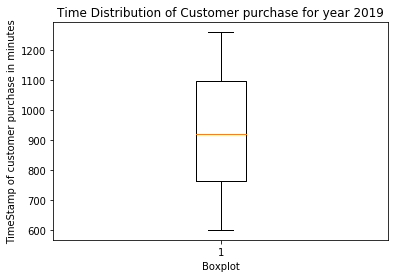

In [105]:
plt.boxplot(df['Time']); # This is the boxplot for the entire year
plt.title('Time Distribution of Customer purchase for year 2019');
plt.xlabel('Boxplot');
plt.ylabel('TimeStamp of customer purchase in minutes');

In [81]:
df['Time'].describe()

count    1000.000000
mean      924.698000
std       191.527788
min       600.000000
25%       763.000000
50%       919.000000
75%      1095.000000
max      1259.000000
Name: Time, dtype: float64

As we can see, minimum time is 600, meaning store opens at **10:00** AM in the morning and maximum time for transaction is 1259, meaning store closes at **9:00 PM**

First quartile (25%) customers do shopping between 10:00 AM to 12:43 PM  
Next quartile customers do shopping between 12:43 PM to 3:20 PM  
Next quartile customers do shopping between 3:20 PM to 6:15 PM  
Fourth quartile customers do shopping between 6:15 PM to 9:00 PM  

Distribution of footfall is almost evenly distributed across the time.  

**One of the ways to increase revenue might be to increase the store hours. For that, we need to do the Cost-Benefit analysis (for which we don't have sufficient data)**

In [106]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,788,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,629,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,803,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,1233,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,637,Ewallet,604.17,4.761905,30.2085,5.3


In [120]:
df['Month'] = df['Date'].apply(lambda x : int((x.split('/'))[0])) # Adding a column that tracks the month of the purchase in the year 2019

In [115]:
df['Month'].unique()

array(['1', '3', '2'], dtype=object)

This tells us that above data is for **first** quarter of the year 2019

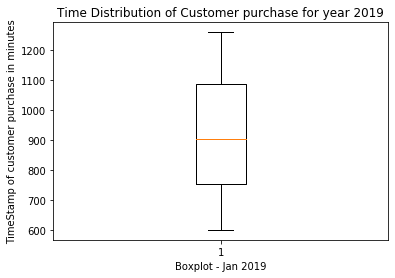

In [127]:
plt.boxplot(df.loc[df['Month']==1]['Time']); # This is the boxplot for Jan-2019
plt.title('Time Distribution of Customer purchase for year 2019');
plt.xlabel('Boxplot - Jan 2019');
plt.ylabel('TimeStamp of customer purchase in minutes');

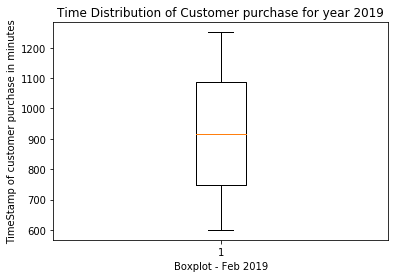

In [128]:
plt.boxplot(df.loc[df['Month']==2]['Time']); # This is the boxplot for Feb-2019
plt.title('Time Distribution of Customer purchase for year 2019');
plt.xlabel('Boxplot - Feb 2019');
plt.ylabel('TimeStamp of customer purchase in minutes');

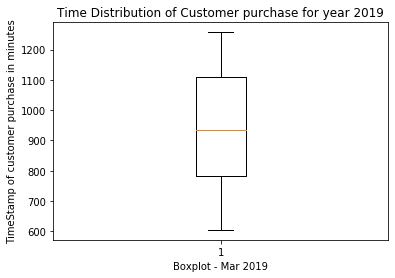

In [129]:
plt.boxplot(df.loc[df['Month']==3]['Time']); # This is the boxplot for Mar-2019
plt.title('Time Distribution of Customer purchase for year 2019');
plt.xlabel('Boxplot - Mar 2019');
plt.ylabel('TimeStamp of customer purchase in minutes');

Looks like, as compared to Feb and March, in Jan there were less footfall ratio in the third quartile of the time. This might be because **of the cold january weather in the evenings**  

Supermarket can run some discounts for items like alcohol, party items, etc. to boost revenues during this time

#### Question 5: Investing the purchase categories

In [130]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,788,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,629,Cash,76.40,4.761905,3.8200,9.6,3


Histogram of the Product line for the year 2019

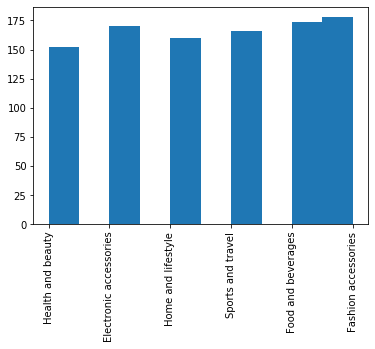

In [142]:
p = plt.hist(df['Product line'])
plt.xticks(rotation='vertical')
plt.show()

Histogram of the Product line for Jan - 2019

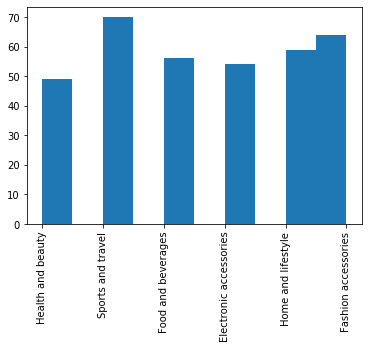

In [146]:
p = plt.hist(df.loc[df['Month']==1]['Product line'])
plt.xticks(rotation='vertical')
plt.show()

Histogram of the Product line for Feb - 2019

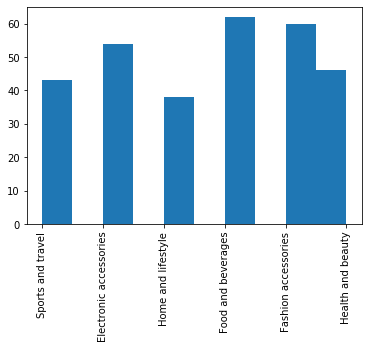

In [144]:
p = plt.hist(df.loc[df['Month']==2]['Product line'])
plt.xticks(rotation='vertical')
plt.show()

Histogram of the Product line for Mar - 2019

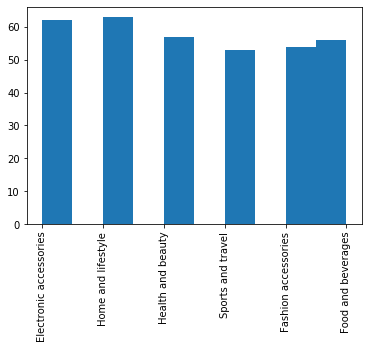

In [145]:
p = plt.hist(df.loc[df['Month']==3]['Product line'])
plt.xticks(rotation='vertical')
plt.show()

We see that in Q1-2019, customers were shopping more of Fashion Accessories (in terms of category)  
For Jan-2019, **Sports and Travel** was the most purchased category  
For Feb-2019, **Food and Beverages** was the most purchased category (maybe because of NFL superbowl home parties) 
For Mar-2019, **Home and Lifestyle** was the most purchased category  

Supermarket may provide addtional discounts on least sold category each month. This can be called **Rotating Category** and can also help in increasing membership by giving disounts only to the members

#### Question 6: Investing the purchase categories

In [147]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,788,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,629,Cash,76.40,4.761905,3.8200,9.6,3


In [158]:
df.groupby(['Customer type']).agg(RatingMean = ('Rating', 'mean'))

,RatingMean
Customer type,
Member,6.940319
Normal,7.005210


Its surprising to see that Members have relatively lower rating as compared to Normal customers. 

In [157]:
df.groupby(['Customer type','Gender']).agg(RatingMean = ('Rating', 'mean'))

RatingMean
Customer type Gender            
Member        Female    6.940613
              Male      6.940000
Normal        Female    6.990417
              Male      7.018919

Female members provide higher rating then Male customers  
Between non-members, Male rate higher than females  
Supermarket might think of catering more to its Male members by adding more items related to male needs